In [1]:
import os
os.chdir("E:/machine hack/News_Popularity")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

In [4]:
train = pd.read_csv("Train.csv")

In [52]:
test = pd.read_csv("Test.csv")

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7928 entries, 0 to 7927
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   n_tokens_title                 7928 non-null   float64
 1   n_tokens_content               7928 non-null   float64
 2   n_unique_tokens                7928 non-null   float64
 3   n_non_stop_words               7928 non-null   float64
 4   n_non_stop_unique_tokens       7928 non-null   float64
 5   num_hrefs                      7928 non-null   float64
 6   num_self_hrefs                 7928 non-null   float64
 7   num_imgs                       7928 non-null   float64
 8   num_videos                     7928 non-null   float64
 9   average_token_length           7928 non-null   float64
 10  num_keywords                   7928 non-null   float64
 11  data_channel_is_lifestyle      7928 non-null   float64
 12  data_channel_is_entertainment  7928 non-null   f

In [6]:
train.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,9.0,286.0,0.552727,1.0,0.612903,6.0,4.0,2.0,1.0,4.702797,...,0.136364,1.0,0.000000,0.0,0.00,0.000000,0.000000,0.500000,0.000000,4751.0
1,10.0,96.0,0.702128,1.0,0.796875,4.0,3.0,10.0,1.0,4.458333,...,0.200000,0.5,-0.650000,-0.7,-0.60,1.000000,0.500000,0.500000,0.500000,1821.0
2,9.0,399.0,0.675532,1.0,0.813433,21.0,1.0,20.0,0.0,4.859649,...,0.100000,0.6,-0.180208,-0.4,-0.10,0.535714,0.285714,0.035714,0.285714,1420.0
3,11.0,1388.0,0.482156,1.0,0.685446,40.0,4.0,2.0,5.0,4.562680,...,0.033333,1.0,-0.260965,-0.5,-0.05,1.000000,-0.500000,0.500000,0.500000,52.0
4,12.0,499.0,0.564682,1.0,0.752508,10.0,0.0,1.0,0.0,4.961924,...,0.100000,0.6,-0.195238,-0.4,-0.10,0.650000,0.350000,0.150000,0.350000,4182.0


In [7]:
train.skew()

n_tokens_title                    0.156962
n_tokens_content                  2.489382
n_unique_tokens                  -1.468793
n_non_stop_words                 -5.586982
n_non_stop_unique_tokens         -2.425495
num_hrefs                         3.965602
num_self_hrefs                    5.303745
num_imgs                          3.855535
num_videos                        6.727811
average_token_length             -4.650847
num_keywords                     -0.137498
data_channel_is_lifestyle         3.888903
data_channel_is_entertainment     1.702287
data_channel_is_bus               1.873871
data_channel_is_socmed            3.781771
data_channel_is_tech              1.546992
data_channel_is_world             1.465823
kw_min_min                        2.376084
kw_max_min                       21.825102
kw_avg_min                       30.073878
kw_min_max                       10.709049
kw_max_max                       -2.646475
kw_avg_max                        0.624076
kw_min_avg 

In [8]:
unwanted_columns = ['n_non_stop_words','num_hrefs','kw_min_min','kw_max_min','kw_min_max','kw_max_max','kw_min_avg','kw_max_avg','self_reference_min_shares','self_reference_max_shares','rate_positive_words','rate_negative_words','avg_negative_polarity']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000862A6E7D88>]],
      dtype=object)

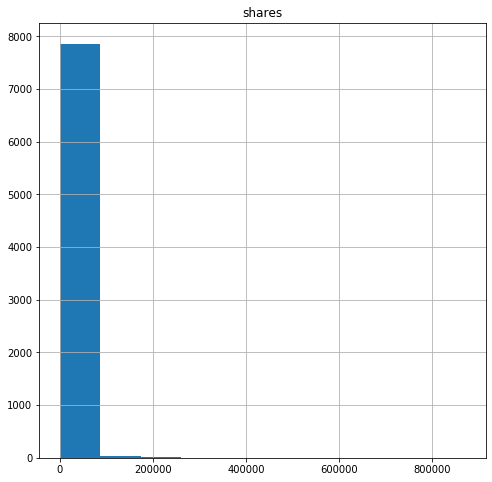

In [9]:
train.hist(column='shares',figsize=(8,8))

In [10]:
train.drop(['n_non_stop_words','n_unique_tokens','kw_avg_min','kw_avg_avg','self_reference_avg_sharess'],axis=1,inplace=True)

In [11]:
train.shape

(7928, 54)

In [12]:
train.head()

,n_tokens_title,n_tokens_content,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,9.0,286.0,0.612903,6.0,4.0,2.0,1.0,4.702797,9.0,0.0,...,0.136364,1.0,0.000000,0.0,0.00,0.000000,0.000000,0.500000,0.000000,4751.0
1,10.0,96.0,0.796875,4.0,3.0,10.0,1.0,4.458333,8.0,0.0,...,0.200000,0.5,-0.650000,-0.7,-0.60,1.000000,0.500000,0.500000,0.500000,1821.0
2,9.0,399.0,0.813433,21.0,1.0,20.0,0.0,4.859649,9.0,0.0,...,0.100000,0.6,-0.180208,-0.4,-0.10,0.535714,0.285714,0.035714,0.285714,1420.0
3,11.0,1388.0,0.685446,40.0,4.0,2.0,5.0,4.562680,10.0,1.0,...,0.033333,1.0,-0.260965,-0.5,-0.05,1.000000,-0.500000,0.500000,0.500000,52.0
4,12.0,499.0,0.752508,10.0,0.0,1.0,0.0,4.961924,7.0,0.0,...,0.100000,0.6,-0.195238,-0.4,-0.10,0.650000,0.350000,0.150000,0.350000,4182.0


In [13]:
train_nor = train

In [14]:
train_nor.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02',
       'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_

In [15]:
y = train_nor['shares']

In [16]:
y

0        4751.0
1        1821.0
2        1420.0
3          52.0
4        4182.0
         ...   
7923      640.0
7924      216.0
7925    18735.0
7926      739.0
7927     2001.0
Name: shares, Length: 7928, dtype: float64

In [17]:
train_nor.drop(['shares'],axis=1,inplace=True)

In [18]:
X = train_nor

In [19]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_news = scaler.fit_transform(X)

In [20]:
scaled_bost= pd.DataFrame(scaled_news,columns=X.columns)
X1 = scaled_bost

In [21]:
X1.head()

,n_tokens_title,n_tokens_content,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,-0.649328,-0.561239,-0.397172,-0.425228,0.168300,-0.308508,-0.062274,0.184732,0.939949,-0.242114,...,-0.089195,0.581808,0.990331,2.046304,1.807609,1.141022,-0.865124,-0.277302,0.829618,-0.687206
1,-0.168892,-0.969368,0.805766,-0.596346,-0.081988,0.670862,-0.062274,-0.107851,0.412678,-0.242114,...,0.700984,1.469610,-1.034544,-3.052986,-0.600926,-5.216097,2.203740,1.602271,0.829618,1.510468
2,-0.649328,-0.318510,0.914033,0.858161,-0.582564,1.895075,-0.316896,0.372458,0.939949,-0.242114,...,-0.388744,0.074493,-0.629569,0.632559,0.431303,0.081502,0.778910,0.796740,-1.642994,0.568608
3,0.311544,1.805908,0.077164,2.483787,0.168300,-0.308508,0.956213,0.017035,1.467219,4.130282,...,0.101181,-0.855584,0.990331,-0.000982,0.087227,0.611262,2.203740,-2.156874,0.829618,1.510468
4,0.791980,-0.103705,0.515665,-0.082991,-0.832851,-0.430930,-0.316896,0.494864,-0.114592,-0.242114,...,-0.597234,0.074493,-0.629569,0.514649,0.431303,0.081502,1.129638,1.038399,-1.034351,0.851166


In [22]:
print(X1.shape)
print(y.shape)

(7928, 53)
(7928,)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000862B027088>,
      dtype=object)

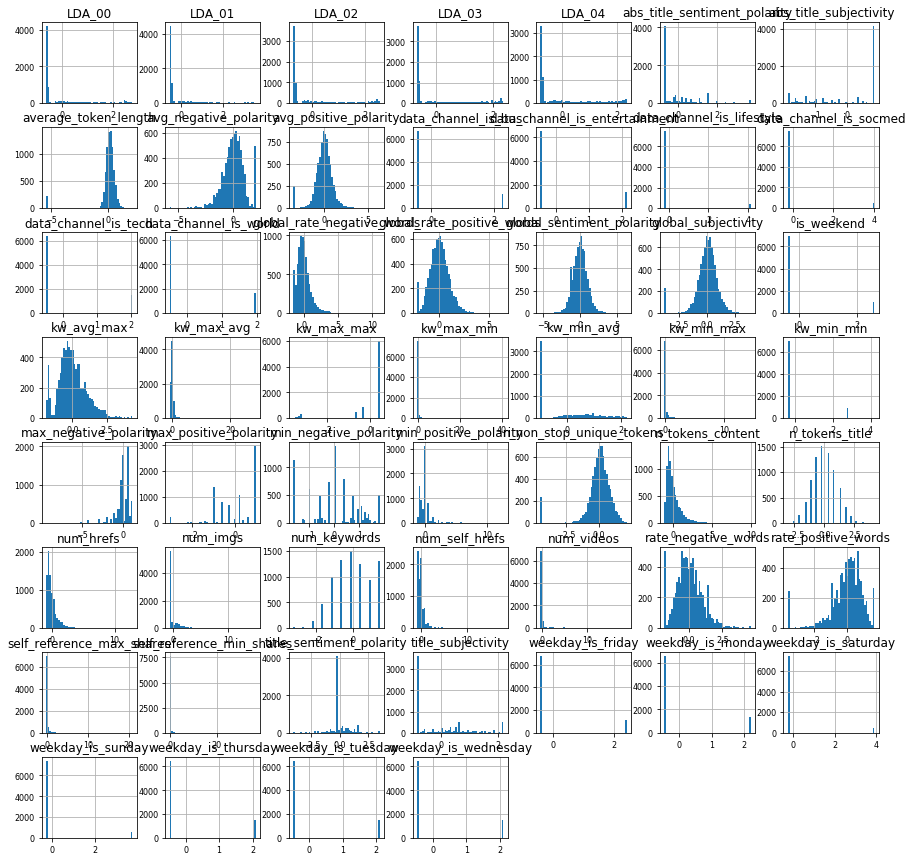

In [23]:
X1.hist(figsize=(15,15), bins=50, xlabelsize=8, ylabelsize=8)

In [24]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X1,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [25]:
print(selection.feature_importances_)

[0.01351407 0.02075769 0.03373839 0.0297197  0.0289915  0.05039694
 0.01353607 0.02080293 0.03924279 0.00230618 0.00421246 0.00213209
 0.00193799 0.00744929 0.00337149 0.03027868 0.02924056 0.03401791
 0.02776037 0.01460396 0.02752673 0.02580091 0.03218145 0.01149442
 0.01970266 0.0031105  0.02411282 0.00349873 0.0045648  0.00224793
 0.01700078 0.006039   0.01219234 0.03983875 0.01455385 0.01360767
 0.01516573 0.02622839 0.05650243 0.01480978 0.02131739 0.02568841
 0.02601915 0.02365501 0.00740262 0.03688447 0.01672906 0.01270691
 0.01096323 0.00667918 0.01301797 0.0106598  0.01008609]


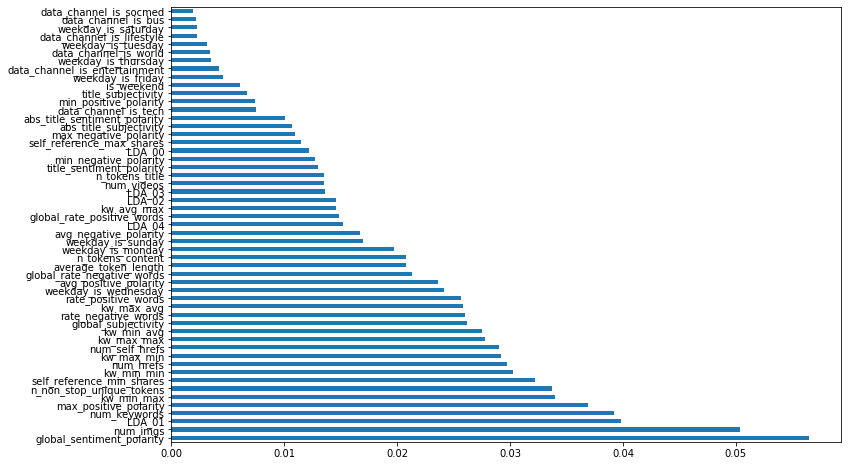

In [26]:
# plot graph of Feature importances for better visualization

plt.figure(figsize = (12,8))
feat_imp = pd.Series(selection.feature_importances_ , index= X1.columns)
feat_imp.nlargest(53).plot(kind ='barh')
plt.show()

In [27]:
feat_imp.nlargest(53)*100

global_sentiment_polarity        5.650243
num_imgs                         5.039694
LDA_01                           3.983875
num_keywords                     3.924279
max_positive_polarity            3.688447
kw_min_max                       3.401791
n_non_stop_unique_tokens         3.373839
self_reference_min_shares        3.218145
kw_min_min                       3.027868
num_hrefs                        2.971970
kw_max_min                       2.924056
num_self_hrefs                   2.899150
kw_max_max                       2.776037
kw_min_avg                       2.752673
global_subjectivity              2.622839
rate_negative_words              2.601915
kw_max_avg                       2.580091
rate_positive_words              2.568841
weekday_is_wednesday             2.411282
avg_positive_polarity            2.365501
global_rate_negative_words       2.131739
average_token_length             2.080293
n_tokens_content                 2.075769
weekday_is_monday                1

In [ ]:
x5

In [28]:
X1.drop(['abs_title_sentiment_polarity','min_negative_polarity','data_channel_is_entertainment','data_channel_is_tech','title_subjectivity','abs_title_subjectivity','weekday_is_friday','is_weekend','weekday_is_tuesday','weekday_is_thursday','data_channel_is_world','data_channel_is_bus','data_channel_is_lifestyle','data_channel_is_socmed','weekday_is_saturday'],axis=1,inplace=True)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X1,y,test_size=0.25,random_state=1)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5946, 38)
(1982, 38)
(5946,)
(1982,)


In [32]:
X_train.head()

,n_tokens_title,n_tokens_content,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,...,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,max_negative_polarity,title_sentiment_polarity
1915,2.233289,0.212058,0.136897,-0.339669,-0.582564,-0.308508,-0.316896,0.425568,0.412678,-0.389421,...,-0.513552,0.613332,-0.593809,0.914763,0.454507,0.074493,0.180381,-0.636997,0.611262,-0.277302
6180,-0.168892,0.096063,-0.100576,0.515924,0.668876,-0.430930,-0.316896,0.156315,1.467219,-0.389421,...,2.178479,-1.065332,1.349660,-1.455772,0.308563,-0.855584,0.990331,-0.405278,-0.183378,1.226356
7516,-0.649328,0.753365,-0.440449,-0.510787,0.418588,-0.308508,-0.062274,0.141934,-0.641863,-0.389421,...,-0.244309,-0.195212,0.145189,0.013374,0.417613,0.581808,0.990331,0.690181,0.081502,1.602271
3529,-0.649328,2.729568,-0.802334,0.601483,1.920316,1.160547,-0.062274,-0.119208,0.939949,-0.389421,...,-0.110750,-0.567484,0.531293,-0.457574,0.477224,-0.158026,0.180381,0.561920,0.611262,1.414314
278,-1.129764,-1.020921,1.577455,-0.681906,-0.332276,-0.553351,-0.062274,0.573680,1.467219,2.741903,...,-1.496702,-0.249563,-0.971705,1.375700,0.216173,3.911063,-1.540763,0.477292,-0.978017,-0.277302


In [33]:
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [34]:
from sklearn import metrics as m

In [35]:
model_params = {
    'DecisionTree_regressor' : {
        'model': DecisionTreeRegressor(),
        'params': {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
         'max_depth':[2,3,4,5,6,7,8]           
        }
    },
    'XGBRegressor': {
        'model': XGBRegressor(),
        'params': {'max_depth':[3,4,5,6,7,8],'min_child_weight':[4,5,6,7,8],'n_estimators':[10,30,50,70,80,100]
        }
    },
    'GradientBoostingRegressor' : {
        'model': GradientBoostingRegressor(),
        'params': {'max_depth':[3,5,6,7],'max_features':['auto','sqrt','log2'],
              'min_samples_split':[2,3,10],'min_samples_leaf':[1,3,10],'n_estimators':[10,30,50,70,90]
        }
    },
    'RandomForestRegressor' : {
        'model': RandomForestRegressor(),
        'params': {'max_depth':[3,5,6,7,8,9],'max_features':['auto','sqrt','log2'],
            'min_samples_split':[2,3,5,7],'min_samples_leaf':[1,3,5,7]}
    }
}

In [36]:
##Normal train & test
scores = []
best_estimators = {}
best_params = {}
cv_res = {}
for algo, mp in model_params.items():
    clf =  RandomizedSearchCV(mp['model'],param_distributions = mp['params'],cv =5,scoring='neg_mean_absolute_error',
                              verbose=1,n_jobs=-1)
    clf.fit(X_train, y_train.values.ravel())
    y_pred = clf.predict(X_test)
    #y_score = clf.predict_proba(X_test)[:,1]
    
       
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'mean_absolute_error' : m.mean_absolute_error(y_test,y_pred),
        'mean_squared_error': m.mean_squared_error(y_test,y_pred),
        'Root_mean_squared_Error': np.sqrt(m.mean_squared_error(y_test,y_pred)),
        'R_squared_Error': m.r2_score(y_test, y_pred),
        'explained_variance':m.explained_variance_score(y_test, y_pred)})
    
    best_estimators[algo] = clf.best_estimator_
    best_params[algo] = clf.best_params_
    
        
df = pd.DataFrame(scores,columns=['model','best_score','mean_absolute_error', 'mean_squared_error', 'Root_mean_squared_Error','R_squared_Error','explained_variance'])
df

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   57.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   37.6s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   51.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.0min finished


,model,best_score,mean_absolute_error,mean_squared_error,Root_mean_squared_Error,R_squared_Error,explained_variance
0,DecisionTree_regressor,-7771.411938,8086.765618,1.351617e+09,36764.345308,0.029643,0.029739
1,XGBRegressor,-7767.972216,7784.808041,1.318849e+09,36315.962516,0.053167,0.053695
2,GradientBoostingRegressor,-7634.169226,8040.458454,1.282350e+09,35809.918806,0.079371,0.079541
3,RandomForestRegressor,-7589.928993,8061.844259,1.312380e+09,36226.782872,0.057812,0.057980


In [37]:
best_params

{'DecisionTree_regressor': {'min_samples_split': 11,
  'min_samples_leaf': 3,
  'max_features': 'auto',
  'max_depth': 4},
 'XGBRegressor': {'n_estimators': 10, 'min_child_weight': 4, 'max_depth': 8},
 'GradientBoostingRegressor': {'n_estimators': 70,
  'min_samples_split': 3,
  'min_samples_leaf': 1,
  'max_features': 'log2',
  'max_depth': 3},
 'RandomForestRegressor': {'min_samples_split': 2,
  'min_samples_leaf': 3,
  'max_features': 'sqrt',
  'max_depth': 8}}

In [38]:
best_estimators

{'DecisionTree_regressor': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'XGBRegressor': XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=8,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=0, num_parallel_tree=1,
              objective='reg:squarederror', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, t

In [39]:
model_params = {
    'DecisionTree_regressor' : {
        'model': DecisionTreeRegressor(min_samples_split= 3,min_samples_leaf= 3,max_features= 'auto',max_depth=5),
        'params': {           
        }
    },
    'XGBRegressor': {
        'model': XGBRegressor(n_estimators= 10, min_child_weight= 4, max_depth= 7),
        'params': {
        }
    },
    'GradientBoostingRegressor' : {
        'model': GradientBoostingRegressor(n_estimators= 10,min_samples_split= 3,min_samples_leaf= 1,max_features= 'auto',
  max_depth= 6),
        'params': {
        }
        },
    'RandomForestRegressor' : {
        'model': RandomForestRegressor(min_samples_split= 3,min_samples_leaf= 5,max_features='log2',max_depth= 8),
        'params': {
            
        }
    }
}

In [40]:
xgb =  XGBRegressor(n_estimators= 10, min_child_weight= 4, max_depth= 7)

In [41]:
xgb.fit(X_train, y_train.values.ravel())

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=7,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [42]:
xgb_pred = xgb.predict(X_test)

In [43]:
xgb_mae = m.mean_absolute_error(y_test,xgb_pred)
xgb_mae

7610.783106491135

In [53]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_test = scaler.fit_transform(test)

In [54]:
scaled_t= pd.DataFrame(scaled_test,columns=test.columns)
test_f = scaled_t

In [55]:
test_f.drop(['abs_title_sentiment_polarity','min_negative_polarity','data_channel_is_entertainment','data_channel_is_tech','title_subjectivity','abs_title_subjectivity','weekday_is_friday','is_weekend','weekday_is_tuesday','weekday_is_thursday','data_channel_is_world','data_channel_is_bus','data_channel_is_lifestyle','data_channel_is_socmed','weekday_is_saturday',
                     'kw_avg_min','n_non_stop_words','kw_avg_avg','self_reference_avg_sharess','n_unique_tokens'],axis=1,inplace=True)

In [56]:
xgb_pred_test = xgb.predict(test_f)

In [57]:
xgb_pred_test

array([5489.1445, 5512.175 , 6402.146 , ..., 5824.487 , 5774.988 ,
       5561.208 ], dtype=float32)

In [58]:
result = pd.DataFrame(xgb_pred_test,columns=['shares'])
result

,shares
0,5489.144531
1,5512.174805
2,6402.145996
3,3398.741211
4,4187.420410
...,...
31711,6544.909180
31712,5543.755859
31713,5824.486816
31714,5774.987793


In [62]:
result.to_csv("E:/machine hack/News_Popularity/submission.csv",index=False,header=True)